# **DATA602: Assignment 8**

## Eric Lehmphul

# **Weeks 10 & 11 - matplotlib & seaborn**

In [45]:
import pandas as pd
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Introduction

The dataset that I am using for this assignment is the "Hotel booking demand" dataset found on www.Kaggle.com (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand). This dataset contains booking information for one city hotel and one resort hotel. This dataset can be used to identify the best time to book a hotel. For the purpose of this assignment I put the data source on my Github at https://github.com/SaneSky109/DATA602/blob/main/Assignments/Assignment8/Data/hotel_bookings.csv.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  

### Read in Data 

In [46]:
# Create Dataframe of dataset
df = pd.read_csv('https://raw.githubusercontent.com/SaneSky109/DATA602/main/Assignments/Assignment8/Data/hotel_bookings.csv')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Explore Data Types

Most variables are integer variables and the remaining are object and float variables. One variable that will need to be adjusted before conducting analysis is the `reservation_status_date`. `reservation_status_date` is an object variable currently and will need to be transformed into a datetime variable.

In [47]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Summary Statistics

#### Numeric

The numeric summary statistics are listed below.

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


#### Categorical

The categorical summary statistics are listed below.

In [49]:
df.describe(include=['object']).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


### Are there any missing values?

There are missing values present in 4 columns: `children`, `country`, `agent`, and `company`. Due to the shear number of missing values in `country` and `agent` I will drop these columns. `children` can be imputed with the median number of children. `country` can be imputed using the mode.

In [50]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<AxesSubplot:>

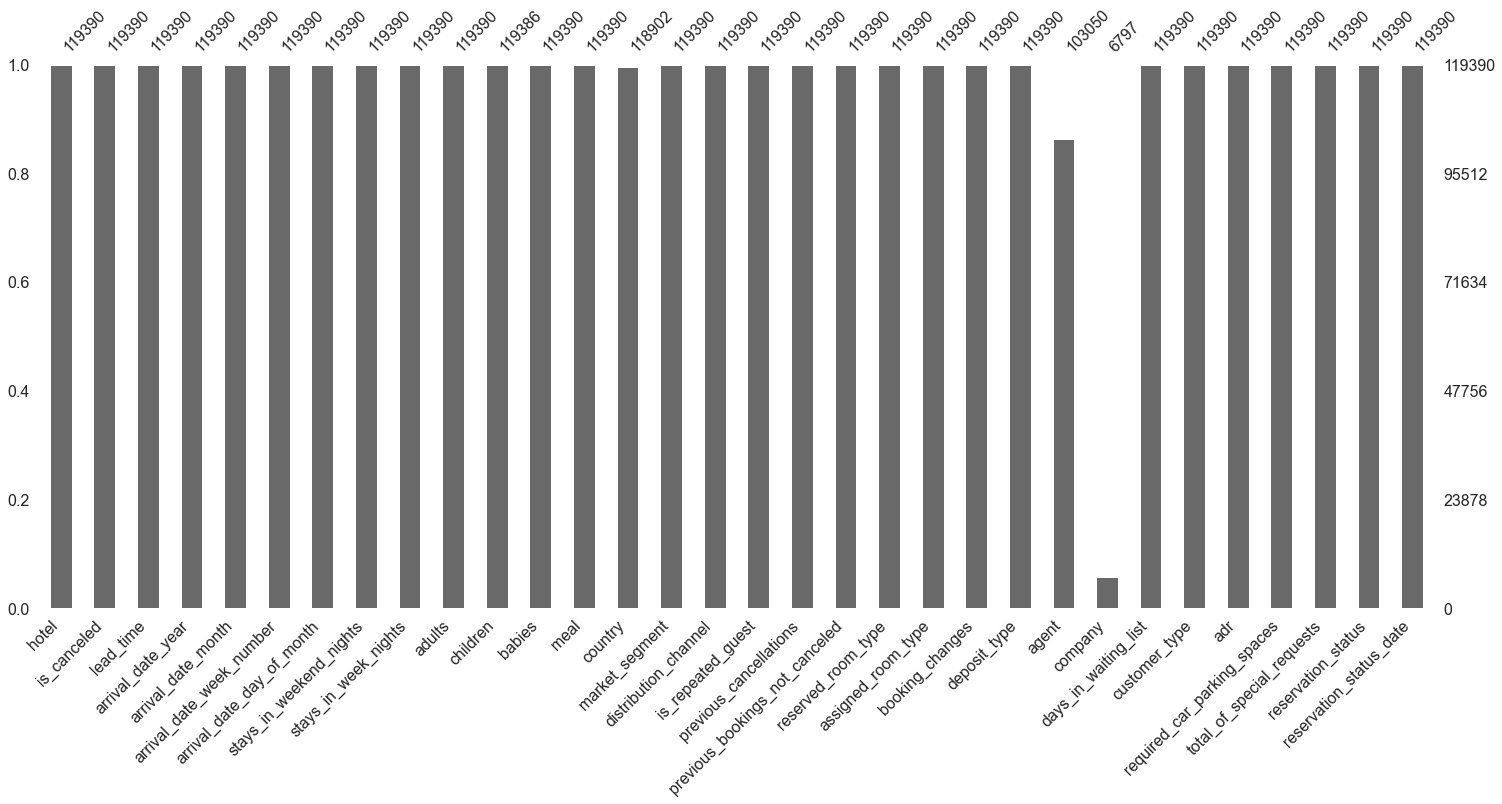

In [51]:
msno.bar(df)

As shown by the counts of the countries in the dataset, the mode would be a decent imputation for the missing country values.

In [52]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

### Remove unnecessary columns

I removed the 2 variables with an astronomical amount of missing values: `company` and `agent`.

In [53]:
df = df.drop(columns = ['company', 'agent'])

### Impute missing values

Two columns need to be imputed to clean the dataset up. `children` will undergo median imputation and `country` will undergo mode imputation.

In [54]:
df['children'] = df['children'].fillna(df['children'].median())
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [55]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Correct Variable Data Types

As mentioned in the data exploration section the `reservation_status_date` needs to be changed from an object to a datetime data type. 

In [56]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [57]:
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

The variable `arrival_date_month` should be converted to an ordered categorical variable.

In [58]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

df["arrival_date_month"] = pd.Categorical(df["arrival_date_month"], categories=months, ordered=True)

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

## Part 1: Matplotlib Plots

### Plot 1: Line Graph - Average Hotel Room Cost per Month

First, I organized the data into a new dataframe to more easily make the line graph.

In [59]:
room_price_data = df[["hotel", "arrival_date_month","adr"]].sort_values("arrival_date_month")

line1_data = room_price_data[room_price_data['hotel'] == 'Resort Hotel']
line2_data = room_price_data[room_price_data['hotel'] != 'Resort Hotel']

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

#line1_data = line1_data["adr_per_person"].groupby(line1_data["arrival_date_month"]).mean()

I then used matplotlib to create two lines on the same graph. It appears that summer months yield the most expensive hotel room costs for Resort Hotels and spring months yield the highest cost for city hotels. 

Plot properties being showcased:
* Use and change a legend position
* Change a legend font size
* Change the title and x/y labels
* Change the marker, line colors, and line width
* Change size of axis Labels
* Change orientation of axis ticks


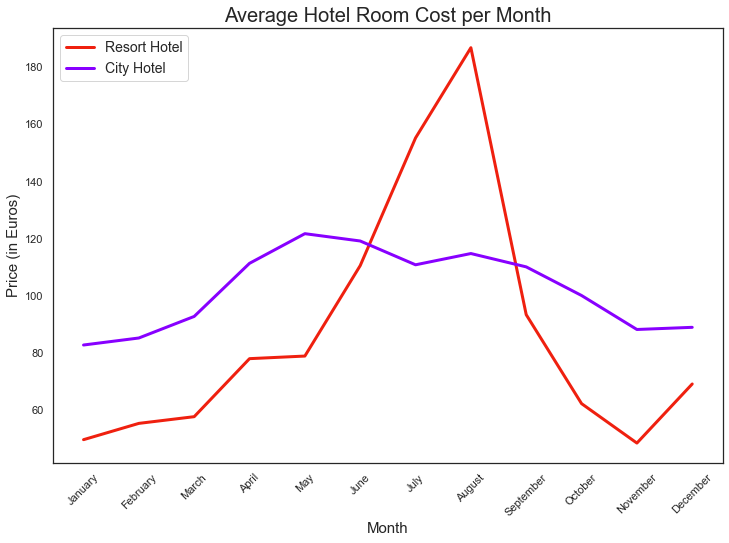

In [60]:
plt.figure(figsize=(12, 8))

plt.plot(months, line1_data["adr"].groupby(line1_data["arrival_date_month"]).mean(), color = "#EF200F", linewidth=3)
plt.plot(months, line2_data["adr"].groupby(line2_data["arrival_date_month"]).mean(), color = "#8800FF", linewidth=3)

plt.title("Average Hotel Room Cost per Month", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Price (in Euros)", fontsize=15)
plt.xticks(rotation=45)
plt.legend(['Resort Hotel', 'City Hotel'], loc = 2, fontsize=14)

plt.show()

### Plot 2: Bar Plot - Market Segmentation by Hotel Type

Similarly to the first plot, I prepared the data to be graphed.

In [61]:
plot2_data = df[['market_segment', "hotel"]]

bar1_data = plot2_data[plot2_data['hotel'] == 'Resort Hotel']
bar2_data = plot2_data[plot2_data['hotel'] != 'Resort Hotel']



bar1_data['freq'] = bar1_data.groupby('market_segment')['market_segment'].transform('count')
bar1_data = bar1_data.drop_duplicates()

bar2_data['freq'] = bar2_data.groupby('market_segment')['market_segment'].transform('count')
bar2_data = bar2_data.drop_duplicates()

labels = ['Offline TA/TO','Online TA','Groups','Complementary', 'Direct', 'Corporate', 'Undefined', 'Aviation']

bar2_freq = bar2_data['freq']
bar1_freq = [7472, 17729, 5836, 201, 6513, 2309, 0, 0]

I then used matplotlib to combine 2 barplots on to one graph. It appears that most of the guests booked the hotel via online and offline travel agents. I would have expected more bookings to be from direct and corporate traffic.

Plot properties being showcased:
* Use and change a legend position
* Change a legend font size
* Change the title and x/y labels
* Change the bar colors
* Change size of axis Labels
* Change orientation of axis ticks
* Show bar values for all bars


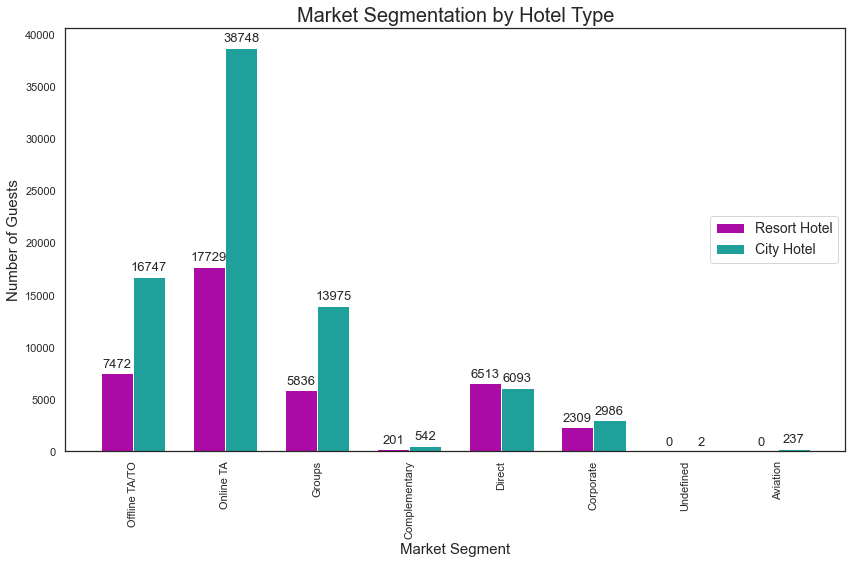

In [62]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, bar1_freq, width, label='Resort Hotel', color = '#AB0BA5')
rects2 = ax.bar(x + width/2, bar2_freq, width, label='City Hotel', color = '#1FA09A')

plt.ylabel('Number of Guests', fontsize=15)
plt.xlabel("Market Segment", fontsize=15)
plt.title('Market Segmentation by Hotel Type', fontsize=20)
plt.xticks(x, labels, rotation='vertical')
plt.legend(fontsize=14,loc = 5)

ax.bar_label(rects1, padding=3, fontsize = 13)
ax.bar_label(rects2, padding=3, fontsize = 13)

fig.tight_layout()
plt.show()

## Part 2: Seaborn Plots

### Plot 1: Line Graph - Average Hotel Room Cost per Month

I seaborn to recreate the line plot from Part 1. It appears that summer months yield the most expensive hotel room costs for Resort Hotels and spring months yield the highest cost for city hotels. 

Plot properties being showcased:
* Use and change a legend position
* Change a legend font size
* Change the title and x/y labels
* Change the marker, line colors, and line width
* Change size of axis Labels
* Change orientation of axis ticks


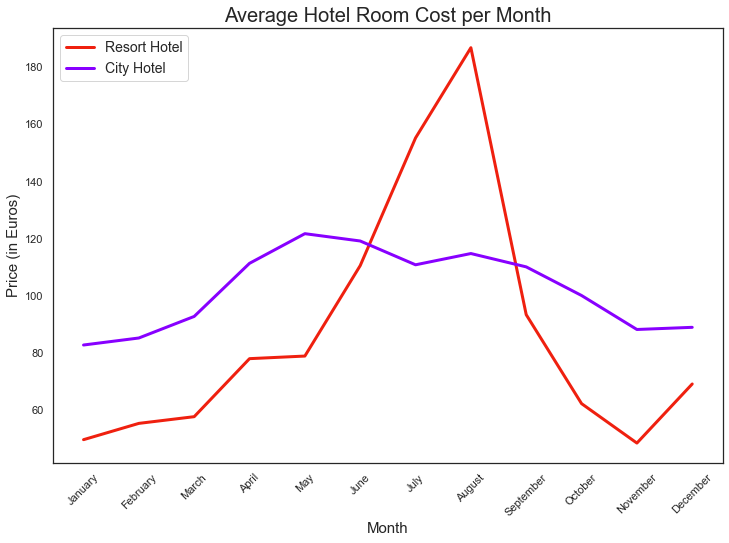

In [63]:
plt.figure(figsize=(12, 8))

sns.set_theme(style="white")

sns.lineplot(months, line1_data["adr"].groupby(line1_data["arrival_date_month"]).mean(), color = "#EF200F", linewidth=3)
sns.lineplot(months, line2_data["adr"].groupby(line2_data["arrival_date_month"]).mean(), color = "#8800FF", linewidth=3)

plt.title("Average Hotel Room Cost per Month", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Price (in Euros)", fontsize=15)
plt.xticks(rotation=45)
plt.legend(['Resort Hotel', 'City Hotel'], loc = 2, fontsize=14)

plt.show()


### Plot 2: Bar Plot - Market Segmentation by Hotel Type

I seaborn to recreate the bar plot from Part 1. It appears that most of the guests booked the hotel via online and offline travel agents. I would have expected more bookings to be from direct and corporate traffic.

Plot properties being showcased:
* Use and change a legend position
* Change a legend font size
* Change the title and x/y labels
* Change the bar colors
* Change size of axis Labels
* Change orientation of axis ticks
* Show bar values for all bars


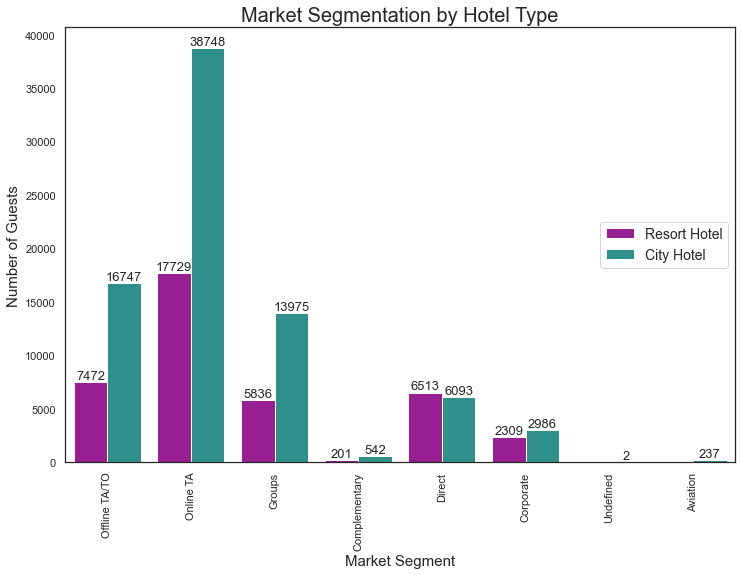

In [64]:
plt.figure(figsize=(12, 8))

custom_palette = ['#AB0BA5', '#1FA09A']
sns.set_palette(custom_palette)
ax = sns.countplot(data = plot2_data, x = 'market_segment', hue = 'hotel', order = labels)

plt.ylabel('Number of Guests', fontsize=15)
plt.xlabel("Market Segment", fontsize=15)
plt.title('Market Segmentation by Hotel Type', fontsize=20)
plt.xticks(x, labels, rotation='vertical')
plt.legend(fontsize=14,loc = 5)

for container in ax.containers:
    ax.bar_label(container, fontsize = 13)

plt.show()


## Part 3: Differences in Matplotlib and Seborn

Matplotlib and Seaborn both provide the necessary components to visualize the data. I would argue that the matplotlib is more difficult to produce similar graphs to the seaborn library. In this assignment both libraries were similar in creating line plots, but different in how to create bar plots.
* Plot 1: Multiple Line Plot
    - Matplotlib and Seaborn both required similar data preprocessing steps. The most discerning difference between the libraries for the line plot was with the function call to make the line plot, Matplotlib used plt.plot() and Seaborn used sns.lineplot().
* Plot 2: Multiple Bar Plot:
    - The amount of data preprocessing for Matplotlib to create a multiple bar plot was much more than what I needed to create a similar plot in Seaborn. Matplotlib required the use of numpy and subplots to create a multiple bar plot. The x coordinates of the bars are also needed for the matplotlib library
    - Seaborn allowed for a similar visualization with much fewed lines of code. Matplotlib required that I create two separate plots and merge them together, Seaborn allowed me to create the visualization in one plot and use the hue argument to group the data by 'hotel' type. 


# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

After exploring this data source on European hotels, I noticed some interesting things. As expected, resort hotels have the most expensive room prices during summer months, especially August. What was interesting about the first plot was that city hotel prices peaked in May and steadily decreased through the rest of the year. Resort hotels prices were far more volatile than the city hotels throughout the year. The second plot showed that most hotels are booked by guests through travel agents. I would have expected there to be more direct and corporate bookings than what the data provided.